In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [55]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [57]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no nan values in the dataset


In [58]:
df.duplicated().sum()

0

In [9]:
df=df.drop(['EmployeeCount','EmployeeNumber'],axis=1)

In [ ]:
df

No duplicate values shown

In [10]:
df=df.drop(['StandardHours'],axis=1)

In [18]:
#find the categorical features and numerical features
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
num_features=[feature for feature in df.columns if df[feature].dtype!='O']

In [19]:
cat_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [20]:
num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

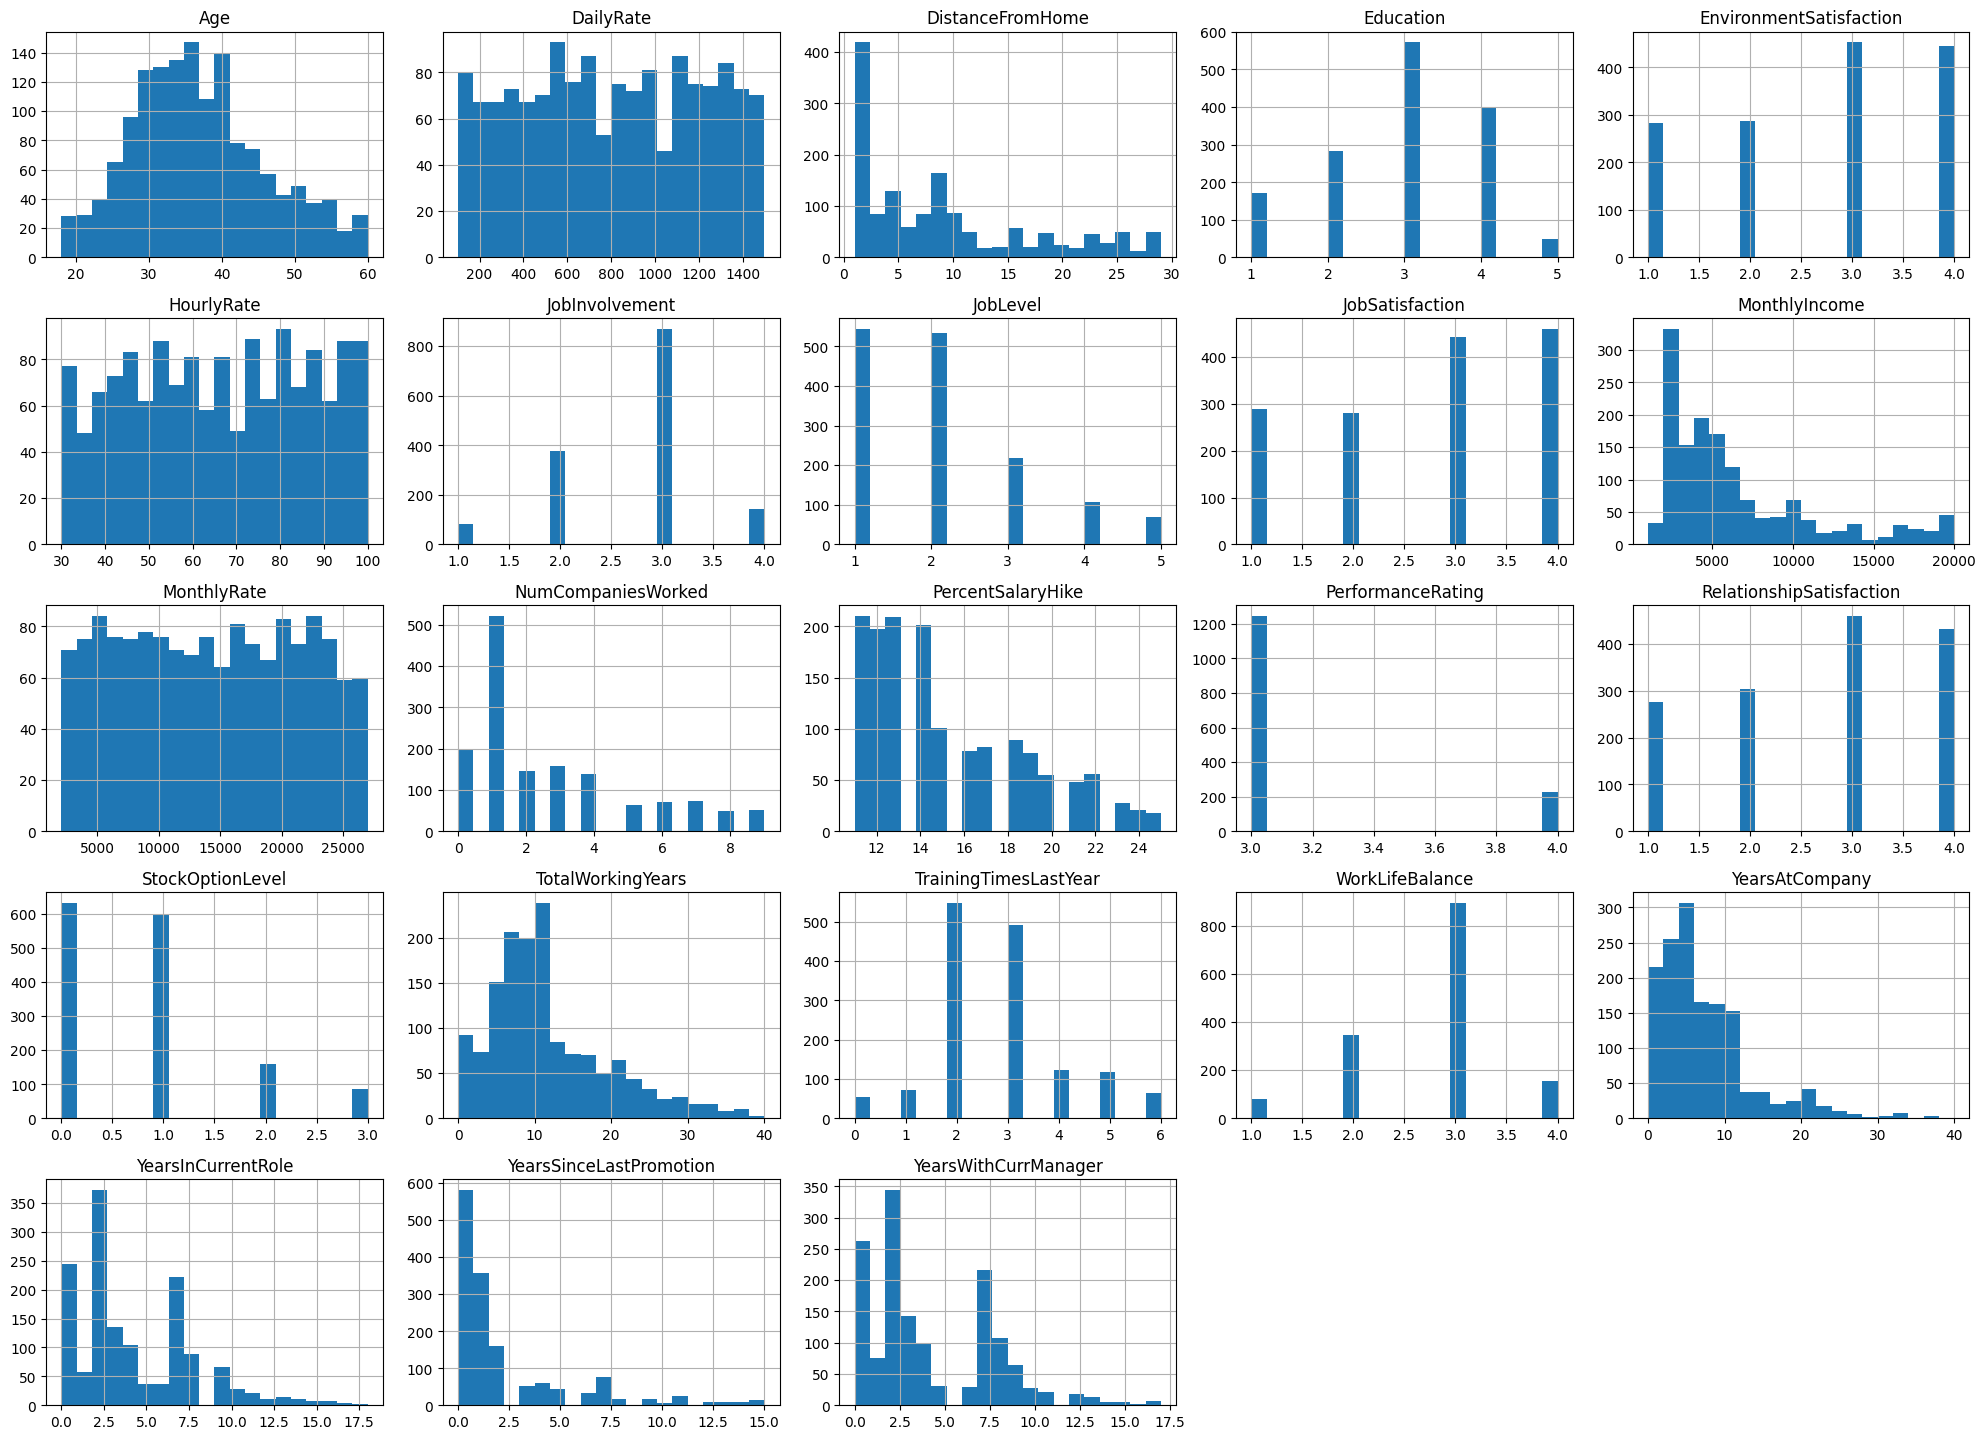

In [71]:
# Plot distributions of numerical features
df[num_features].hist(figsize=(20, 20), bins=20, layout=(7, 5))
plt.tight_layout()


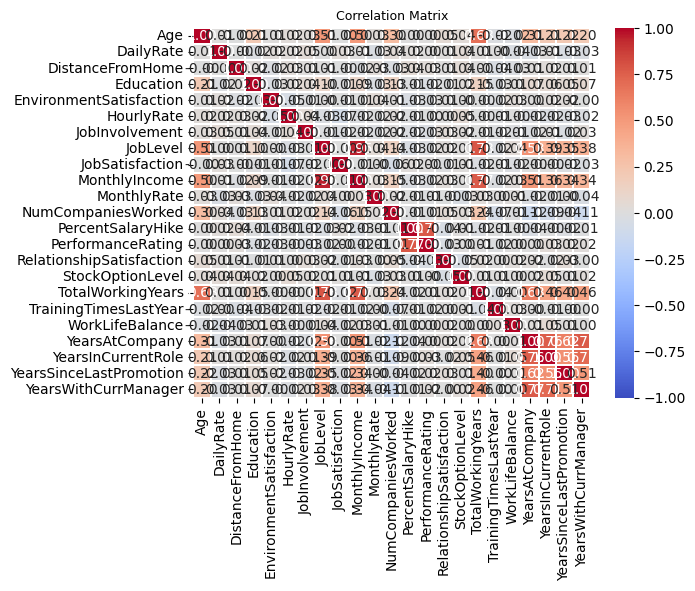

In [72]:
#plot using heatmap
sns.heatmap(df[num_features].corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.2,
            vmin=-1,vmax=1,)
plt.title('Correlation Matrix',fontsize=9)
plt.show()

In [ ]:
df[num_features].corr()

In [74]:
target_count = df['Attrition'].value_counts().reset_index()
target_count.columns = ['Attrition', 'Count']

# Plot using Plotly
fig = px.bar(target_count, x='Attrition', y='Count', color='Attrition',
             title='Target Count',
             labels={'Target': 'Attrition', 'Count': 'Number of Employees'},
             text='Count',
             color_discrete_sequence=['#C02B34', '#CDBBA7'])

fig.update_traces(texttemplate='%{text}', textposition='outside',
                 marker_line=dict(width=1, color='#1F0202'))

fig.update_layout(paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', font_color='#28221D',
                  height=500)

# Show the plot
fig.show()

In [75]:
plot_df = df.groupby(['Attrition', 'BusinessTravel']).size().reset_index(name='Count')
plot_df['Percent'] = plot_df.groupby('Attrition')['Count'].transform(lambda x: 100 * x / x.sum())

fig = px.bar(plot_df, x='BusinessTravel', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})

fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside',
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A'],
                  marker_line=dict(width=1, color='#28221D'))

fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by BusinessTravel', bargap=.09, font_color='#28221D',
                  xaxis_title='BusinessTravel', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')

fig.show()


In [78]:
df.groupby(['Attrition', 'Department']).size().reset_index(name='Count')

,Attrition,Department,Count
0,No,Human Resources,51
1,No,Research & Development,828
2,No,Sales,354
3,Yes,Human Resources,12
4,Yes,Research & Development,133
5,Yes,Sales,92


<Axes: xlabel='Attrition', ylabel='count'>

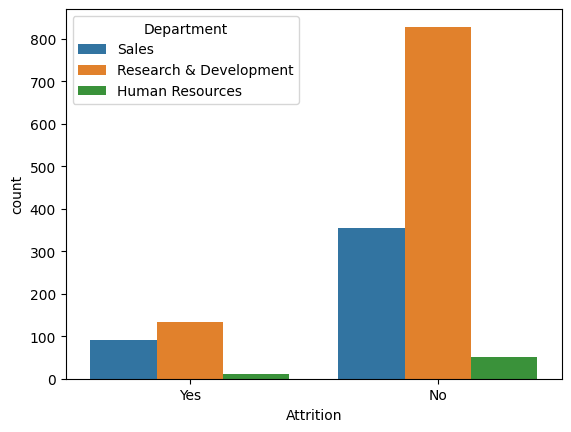

In [79]:
sns.countplot(x='Attrition',hue='Department',data=df)

In [81]:
plot_df = df.groupby(['Attrition', 'EducationField']).size().reset_index(name='Count')
plot_df['Percent'] = plot_df.groupby('Attrition')['Count'].transform(lambda x: 100 * x / x.sum())

fig = px.bar(plot_df, x='EducationField', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})

fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside',
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3', '#C02B34', '#CDBBA7'],
                  marker_line=dict(width=1, color='#28221D'))

fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by EducationField', bargap=.09, font_color='#28221D',
                  xaxis_title='EducationField', paper_bgcolor='#F4F2F1', plot_bgcolor='#F4F2F1')

fig.show()


In [82]:
plot_df = df.groupby(['Attrition', 'JobRole']).size().reset_index(name='Count')
plot_df['Percent'] = plot_df.groupby('Attrition')['Count'].transform(lambda x: 100 * x / x.sum())

fig = px.bar(plot_df, x='JobRole', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})

fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside',
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3', '#C02B34', '#CDBBA7', '#28221D', '#F4F2F0', '#F0F3F3'],
                  marker_line=dict(width=1, color='#28221D'))

fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by JobRole', bargap=.09, font_color='#28221D',
                  xaxis_title='JobRole', paper_bgcolor='#F4F2F1', plot_bgcolor='#F4F2F1')

fig.show()

<Axes: xlabel='Attrition', ylabel='count'>

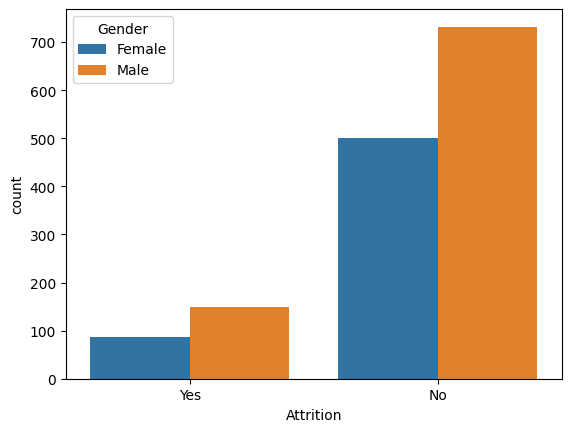

In [85]:
sns.countplot(x='Attrition',hue='Gender',data=df)

In [86]:
age_att = df.groupby(['Age', 'Attrition']).size().reset_index(name='Counts')

fig = px.line(age_att, x='Age', y='Counts', color='Attrition',
              title='Agewise Counts of People in an Organization',
              labels={'Age': 'Age', 'Counts': 'Counts'})

fig.update_layout(title_text='Counts of People by Age and Attrition',
                  xaxis_title='Age', yaxis_title='Counts',
                  font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')

fig.show()

In [88]:
rate_att=df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')

fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')

fig.update_layout(title_text='Counts of People by MonthlyIncome and Attrition',
                  xaxis_title='Age', yaxis_title='Counts',
                  font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [89]:
sats_att=df.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

fig = px.line(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')

fig.update_layout(font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [91]:
jobsats_att=df.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

fig = px.area(jobsats_att,x='JobSatisfaction',y='Counts',color='Attrition',title='Job Satisfaction level Counts of People in an Organization')

fig.update_layout(font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [92]:
yrscr_att=df.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

fig = px.line(yrscr_att,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organization')

fig.update_layout(font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [95]:
hike_att=df.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

fig = px.area(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

fig.update_layout(font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [97]:
man_att=df.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

fig = px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='people spending years with a Manager in an Organization')

fig.update_layout(font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [98]:
plot_df=df.sort_values(by="Attrition")

fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition',
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})

fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

In [99]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories(
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#73AF8E', '#4F909B', '#707BAD', '#A89DB7','#C99193']
fig = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome',
                 color='JobLevel', size='MonthlyIncome',
                 color_discrete_sequence=col,
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})

fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='Monthly income increases with total number of years worked and job level <br>',
                  xaxis_title='Total Working Years', yaxis=dict(title='Income',tickprefix='$'),
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()


##Preprocessing

In [ ]:
# remove the features those are not relevent "Over18,employee number,Employee
# count,StandardHours

In [21]:
X = df.drop(labels=['Attrition'],axis=1)
y = df['Attrition']

In [22]:
#change the target column to map 0 and 1
y=y.map({'Yes':1,'No':0})


In [31]:
#find the categorical features and numerical features
cat_features=[feature for feature in X.columns if df[feature].dtype=='O']
num_features=[feature for feature in X.columns if df[feature].dtype!='O']

#Feature selection for numerical features

In [32]:

X_num = X[num_features]

k_best_numerical = SelectKBest(f_classif,k=10)
k_best_numerical.fit_transform(X_num,y)
selected_num_features = list(X_num.columns[k_best_numerical.get_support()])
selected_num_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

# Features selection in categorical features

In [54]:
X_cat = X[cat_features]
oe = OrdinalEncoder()
X_cat_encoded = pd.DataFrame(oe.fit_transform(X_cat),columns=oe.get_feature_names_out())
k_best_categorical = SelectKBest(chi2,k=5)
k_best_categorical.fit_transform(X_cat_encoded,y)
selected_cat_features = list(X_cat_encoded.columns[k_best_categorical.get_support()])
selected_cat_features

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [55]:
X_selected = pd.concat([X[selected_num_features], X[selected_cat_features]],axis=1)


In [56]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1470 non-null   int64 
 1   JobInvolvement        1470 non-null   int64 
 2   JobLevel              1470 non-null   int64 
 3   JobSatisfaction       1470 non-null   int64 
 4   MonthlyIncome         1470 non-null   int64 
 5   StockOptionLevel      1470 non-null   int64 
 6   TotalWorkingYears     1470 non-null   int64 
 7   YearsAtCompany        1470 non-null   int64 
 8   YearsInCurrentRole    1470 non-null   int64 
 9   YearsWithCurrManager  1470 non-null   int64 
 10  Department            1470 non-null   object
 11  EducationField        1470 non-null   object
 12  JobRole               1470 non-null   object
 13  MaritalStatus         1470 non-null   object
 14  OverTime              1470 non-null   object
dtypes: int64(10), object(5)
memory usage: 

In [57]:
#train split the data
X_train,X_test,y_train,y_test=train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [58]:
X_train.shape,X_test.shape ,y_train.shape,y_test.shape

((1176, 15), (294, 15), (1176,), (294,))

In [59]:
#create numeric and categorical column pipeline
num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
cat_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder())
])

In [60]:
#create column transformer
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,selected_num_features),
    ('cat_pipeline',cat_pipeline,selected_cat_features)
])

## Transform the data with column transormer

In [61]:
#transform the data with columntransform

X_train_transformed=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test_transformed=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
print("Transformation successful!")


Transformation successful!


In [62]:
    print(X_train_transformed.shape,X_test_transformed.shape)


(1176, 33) (294, 33)


In [63]:
preprocessor.get_feature_names_out()


array(['num_pipeline__Age', 'num_pipeline__JobInvolvement',
       'num_pipeline__JobLevel', 'num_pipeline__JobSatisfaction',
       'num_pipeline__MonthlyIncome', 'num_pipeline__StockOptionLevel',
       'num_pipeline__TotalWorkingYears', 'num_pipeline__YearsAtCompany',
       'num_pipeline__YearsInCurrentRole',
       'num_pipeline__YearsWithCurrManager',
       'cat_pipeline__Department_Human Resources',
       'cat_pipeline__Department_Research & Development',
       'cat_pipeline__Department_Sales',
       'cat_pipeline__EducationField_Human Resources',
       'cat_pipeline__EducationField_Life Sciences',
       'cat_pipeline__EducationField_Marketing',
       'cat_pipeline__EducationField_Medical',
       'cat_pipeline__EducationField_Other',
       'cat_pipeline__EducationField_Technical Degree',
       'cat_pipeline__JobRole_Healthcare Representative',
       'cat_pipeline__JobRole_Human Resources',
       'cat_pipeline__JobRole_Laboratory Technician',
       'cat_pipeline__Job

In [64]:
#Model the data

rfc = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=21)
rfc.fit(X_train_transformed,y_train)
y_pred=rfc.predict(X_test_transformed)

In [65]:
accuracy_score(y_test,y_pred)

0.8707482993197279

In [66]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(rfc,X_train_transformed,y_train,cv=skf,scoring='accuracy')
scores

array([0.85169492, 0.87234043, 0.84255319, 0.85106383, 0.85106383])

In [67]:
np.mean(scores)


0.8537432383699963

In [68]:
#Hyperparameter tunning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [69]:
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=skf,
                          n_iter=50,
                          scoring='accuracy',
                          verbose=3)

In [70]:
rscv.fit(X_train_transformed,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.860 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.851 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.860 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.855 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.872 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.856 total time=   0.6s
[CV 2/5] END max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.830 total time=   0.6s
[CV 3/5] END max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.855 total time=   0.6s
[C

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='accuracy', verbose=3)

In [71]:
rscv.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 9}

In [72]:
rscv.best_score_


0.8647890371438877

In [73]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=400)

In [74]:
ypred_test = best_rfc.predict(X_test_transformed)


In [75]:
accuracy_score(y_test,ypred_test)

0.8741496598639455

<Axes: >

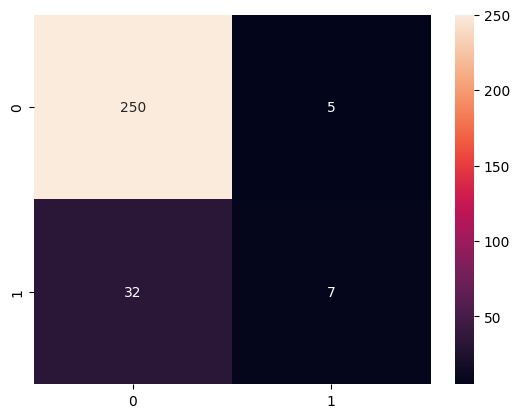

In [76]:
cf = confusion_matrix(y_test, ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

The score shows 0.86,however the dataset are imbalanced,so can be improved by SMOTE,then can be check the accuracy

## create a voting classifier

In [77]:
#create a classifier pipeline
lr=LogisticRegression(C=1)
rfc=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=21)
vc=VotingClassifier(estimators=[('lr',lr),('rfc',rfc)],voting='soft')



In [78]:
vc.fit(X_train_transformed,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1)),
                             ('rfc',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=21))],
                 voting='soft')

In [80]:
ypred_test = vc.predict(X_test_transformed)
ypred_test


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
accuracy_score(y_test,ypred_test)

0.8673469387755102

In [83]:
print(classification_report(y_test,ypred_test))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.50      0.21      0.29        39

    accuracy                           0.87       294
   macro avg       0.69      0.59      0.61       294
weighted avg       0.84      0.87      0.84       294



#Acuuracy score in voting classifier is 0.87

<Axes: >

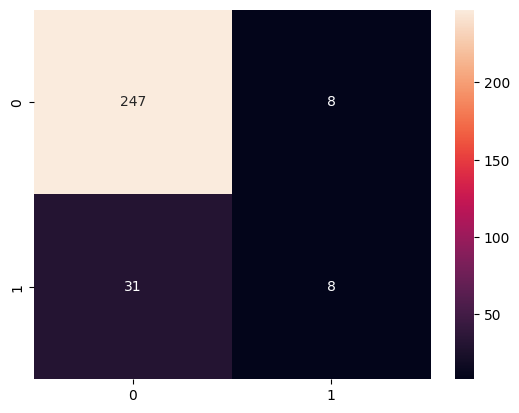

In [85]:
cf = confusion_matrix(y_test,ypred_test)
sns.heatmap(cf,annot=True,fmt='d')